## Data Preprocessing

In [26]:
import pandas as pd
import os
import numpy as np
import seaborn as sb
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
#os.chdir('c:\\Users\\hansu\\Downloads')
nfl = pd.read_csv("NFL_data_cleaned.csv")
#Backup created so that play type can be preserved
nfl_backup = nfl.dropna(subset = ["play_type"])

nfl1 = nfl.dropna(subset = ["play_type"])
nfl1 = nfl1[nfl1.play_type != "kickoff"]
nfl1 = nfl1[nfl1.play_type != "no_play"]
nfl1['play_type'] = nfl1['play_type'].replace({'extra_point': 'kick'})
nfl1['play_type'] = nfl1['play_type'].replace({'field_goal': 'kick'})
nfl1['play_type'] = nfl1['play_type'].replace({'punt': 'kick'})
nfl1 = nfl1.drop(["play_id", "game_id", "half_seconds_remaining", "game_half", "quarter_end", "drive", "sp", "goal_to_go", "ydsnet", "yards_gained"], axis = 1)

### One-Hot Encoding

In [13]:
# convert to an array
nfl_home = array(nfl1["home_team"])

# encode as integers
home_encoder = LabelEncoder()
home_encoded =  home_encoder.fit_transform(nfl_home) 
 
# binary encode
home_onehot_encoder = OneHotEncoder(sparse=False) # disable sparse return type
# reshape the array
home_encoded = home_encoded.reshape(len(home_encoded), 1) 
home_onehot_encoded = home_onehot_encoder.fit_transform(home_encoded) 

nfl1["home_team"] = home_onehot_encoded.tolist()

# convert to an array
nfl_away = array(nfl1["away_team"])

# encode as integers
away_encoder = LabelEncoder()
away_encoded =  away_encoder.fit_transform(nfl_away) 
 
# binary encode
away_onehot_encoder = OneHotEncoder(sparse=False) # disable sparse return type
# reshape the array
away_encoded = away_encoded.reshape(len(away_encoded), 1) 
away_onehot_encoded = away_onehot_encoder.fit_transform(away_encoded) 

nfl1["away_team"] = away_onehot_encoded.tolist()

# convert to an array
quarter = array(nfl1["qtr"])

# encode as integers
quarter_encoder = LabelEncoder()
quarter_encoded =  quarter_encoder.fit_transform(quarter) 

# binary encode
quarter_onehot_encoder = OneHotEncoder(sparse=False) # disable sparse return type
# reshape the array
quarter_encoded = quarter_encoded.reshape(len(quarter_encoded), 1) 
quarter_onehot_encoded = quarter_onehot_encoder.fit_transform(quarter_encoded)

nfl1["qtr"] = quarter_onehot_encoded.tolist()

# convert to an array
posteam = array(nfl1["posteam"])

# encode as integers
posteam_encoder = LabelEncoder()
posteam_encoded =  posteam_encoder.fit_transform(posteam) 

# binary encode
posteam_onehot_encoder = OneHotEncoder(sparse=False) # disable sparse return type
# reshape the array
posteam_encoded = posteam_encoded.reshape(len(posteam_encoded), 1) 
posteam_onehot_encoded = posteam_onehot_encoder.fit_transform(posteam_encoded)

nfl1["posteam"] = posteam_onehot_encoded.tolist()

# encoding play_type
# convert to an array
nfl_home = array(nfl1["play_type"])

# encode as integers
home_encoder = LabelEncoder()
home_encoded =  home_encoder.fit_transform(nfl_home) 
 
# binary encode
home_onehot_encoder = OneHotEncoder(sparse=False) # disable sparse return type
# reshape the array
home_encoded = home_encoded.reshape(len(home_encoded), 1) 
home_onehot_encoded = home_onehot_encoder.fit_transform(home_encoded) 

nfl1["play_type"] = home_onehot_encoded.tolist()

In [14]:
nfl1["home_team"] = home_onehot_encoded.tolist()
nfl1["away_team"] = away_onehot_encoded.tolist()
nfl1["qtr"] = quarter_onehot_encoded.tolist()
nfl1["posteam"] = posteam_onehot_encoded.tolist()
nfl1["play_type"] = home_onehot_encoded.tolist()

In [15]:
nfl1

,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,game_seconds_remaining,qtr,down,time,yrdln,ydstogo,play_type
1,"[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",home,TEN,PIT,58.0,9/10/09,893.0,3593.0,"[1.0, 0.0, 0.0, 0.0, 0.0]",1.0,14:53,PIT 42,10,"[0.0, 1.0, 0.0, 0.0, 0.0]"
2,"[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",home,TEN,PIT,53.0,9/10/09,856.0,3556.0,"[1.0, 0.0, 0.0, 0.0, 0.0]",2.0,14:16,PIT 47,5,"[0.0, 0.0, 0.0, 0.0, 1.0]"
3,"[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",home,TEN,PIT,56.0,9/10/09,815.0,3515.0,"[1.0, 0.0, 0.0, 0.0, 0.0]",3.0,13:35,PIT 44,8,"[0.0, 1.0, 0.0, 0.0, 0.0]"
4,"[1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",home,TEN,PIT,56.0,9/10/09,807.0,3507.0,"[1.0, 0.0, 0.0, 0.0, 0.0]",4.0,13:27,PIT 44,8,"[1.0, 0.0, 0.0, 0.0, 0.0]"
5,"[0.0, 0.0, 0.0, 0.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",away,PIT,TEN,98.0,9/10/09,796.0,3496.0,"[1.0, 0.0, 0.0, 0.0, 0.0]",1.0,13:16,TEN 2,10,"[0.0, 0.0, 0.0, 0.0, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449365,"[0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",home,NO,CAR,66.0,12/17/18,64.0,64.0,"[0.0, 0.0, 0.0, 1.0, 0.0]",1.0,1:04:00,CAR 34,10,"[0.0, 0.0, 0.0, 1.0, 0.0]"
449366,"[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",home,NO,CAR,66.0,12/17/18,63.0,63.0,"[0.0, 0.0, 0.0, 1.0, 0.0]",2.0,1:03:00,CAR 34,10,"[0.0, 1.0, 0.0, 0.0, 0.0]"
449367,"[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",home,NO,CAR,66.0,12/17/18,58.0,58.0,"[0.0, 0.0, 0.0, 1.0, 0.0]",3.0,0:58:00,CAR 34,10,"[0.0, 1.0, 0.0, 0.0, 0.0]"
449368,"[0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",home,NO,CAR,61.0,12/17/18,38.0,38.0,"[0.0, 0.0, 0.0, 1.0, 0.0]",4.0,0:38:00,CAR 39,5,"[0.0, 1.0, 0.0, 0.0, 0.0]"


### Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

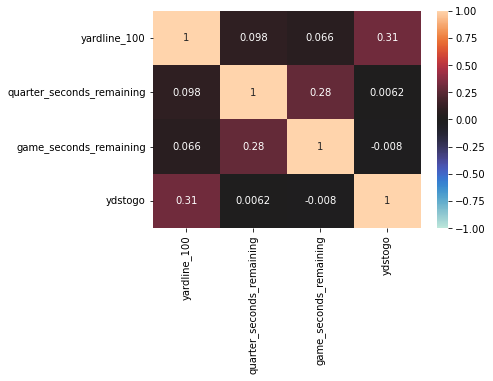

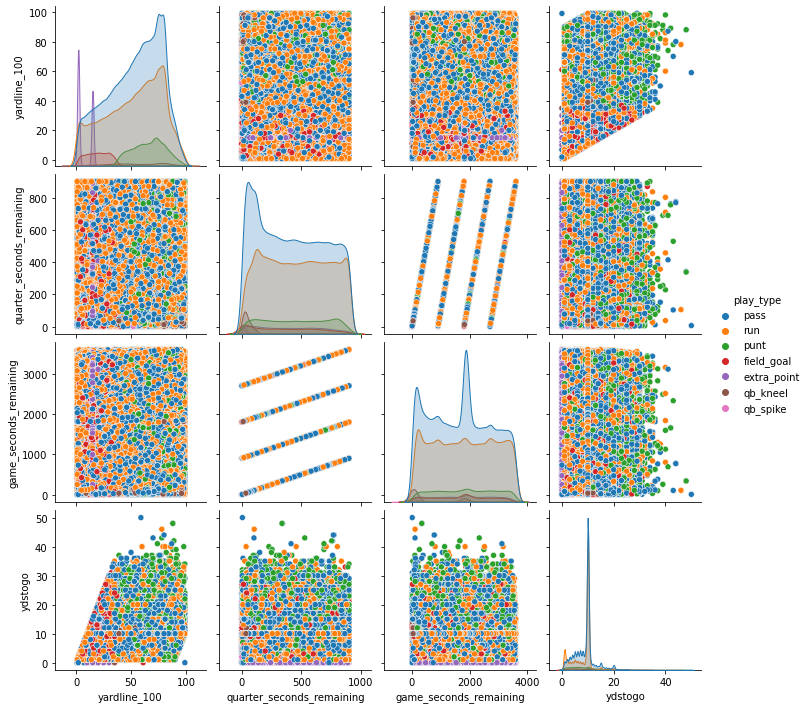

In [28]:
#Data visualization
#First is a heatmap of the continuous variables
#nfl1 is data frame, copy to nfl_copy

#Drop string columns
nfl_copy = nfl1.copy()
nfl_copy.drop("posteam_type", axis=1, inplace=True)
nfl_copy.drop("defteam", axis=1, inplace=True)
nfl_copy.drop("side_of_field", axis=1, inplace=True)
nfl_copy.drop("game_date", axis=1, inplace=True)
#Perhaps yrdln could be converted to some sort of number
nfl_copy.drop("yrdln", axis=1, inplace=True)
#Perhaps time could be converted to a number
nfl_copy.drop("time", axis=1, inplace=True)
#Debug: display nfl_copy
#nfl_copy

#make nfl_copy2 in case we want to compare discrete variables
nfl_copy2 = nfl_copy.copy()
#drop discrete variable columns
nfl_copy2.drop("home_team", axis=1, inplace=True)
nfl_copy2.drop("away_team", axis=1, inplace=True)
nfl_copy2.drop("posteam", axis=1, inplace=True)
nfl_copy2.drop("qtr", axis=1, inplace=True)
#Down can only be 1-4, so will have to drop as well
nfl_copy2.drop("down", axis=1, inplace=True)
#Preserve play type and remove encoding for pairplot with copy #3
nfl_copy3 = nfl_copy2.copy()
nfl_copy3["play_type"] = nfl_backup["play_type"]
nfl_copy2.drop("play_type", axis=1, inplace=True)

#Make heatmap
sb.heatmap(nfl_copy2.corr(), annot=True, vmin=-1, vmax=1, center=0)
#Make pairplots
nfl_plots = sb.pairplot(nfl_copy3, hue='play_type', diag_kind='kde')
nfl_plots.savefig("nfl_pairplots.png")
plt.show